### Bank Marketing Data Set

Los datos utilizados para esta práctica se pueden descargar del siguiente link.
https://archive.ics.uci.edu/ml/datasets/bank+marketing

A continuación se cargan las librerías necesarias para el primer análisis

In [1]:
import os, sys
import numpy as np
import pandas as pd
import pandas_profiling   ####Verificar que esté instalada. Si no está instalada, se puede utilziar el comando conda install -c conda-forge pandas-profiling --y
from IPython.display import Image
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV   #####Revisar esta librería.
from sklearn.neural_network import MLPClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
#import pydotplus

#from sklearn.externals import joblib

###  Configuración del directorio y lectura de los datos

In [2]:
# %cd C:\Users\USUARIO\Documents\monitoria_cda_2020_02\Clases_Python\Clase8_Python\bank-additional 
    
    

In [3]:
##Importante, el archivo no está seoarada por comas, si no por punto y coma
data=pd.read_csv('bank-additional-full.csv', sep=";")


In [4]:
#######Esto es una prueba para leer los datos del parcial
#%cd C:\Users\USUARIO\Documents\monitoria_marketing\Parcial_marketing  
##Codigo para leer data del parcial
#data_parcial = pd.read_excel('data_parcial.xlsx')

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


A continnuación, se detalla las primeras filas del dataframe, con el fin de verificar que el archivo esté correctamente cargado

In [6]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


A continuación, se obtiene el tipo de cada una de las variables.

In [7]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

## Finalmente, se obtiene el tamaño del dataframe

In [8]:
data.shape

(41188, 21)

### Metodología analítica

In [9]:
Image(url= "https://www.ibmbigdatahub.com/sites/default/files/figure01_revised.jpg")

Metodologìa ASUM.
1. Entendiendo el negocio
2. Acercamiento analítico
3. Requerimiento de los datos
4. Recolección de los datos
5. Entendimiento de los datos
6. Prepraraciòn de los datos 
7. Modelamiento.
8. Evaluación
9. Despliegue
10. Feedback

ver referencia https://www.ibmbigdatahub.com/blog/why-we-need-methodology-data-science

### Entendimiento de la data y el negocio

Los datos están relacionados con campañas de marketing de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente para que el cliente se suscriba a un depósito a plazo. Por otra parte, la data que se cargó es la denominada "bank-additional-full", la cual contiene 41188 observacioes y 21 variables, y son observaciones ordenadas por fecha (de Mayo de 2008 a Noviembre de 2010), estos datos son los utilizados en [Moro et al., 2014]

#### Importante
Cada observación corresponde a un contacto con el cliente, esto es muy importante, dado que, según la descripción anterior, un cliente puede estar dos veces en la data, donde, en un contacto pudo no suscribirse y en segundo contacto si. En la siguiente ítem se analizarán las distintas variables del archivo.

### Descripción de las variables.

Se puede observar distintos tipos de variables  por ejemplo, age es numérico y representa a la edad del cliente, job o tipo de trabajo es categórco, estado civil categórico, nivel educativo categórico, por otra parte, la variable default indica si el cliente tiene créditos en mora o no y es categórica, housing indica si el cliente tiene o no vivienda y es categórica, loan indica si tiene o no préstamo y es categórica, contact indica la forma en la cual se contactó el cliente (de forma telefónica, por celular, etc), month indica el mes de contacto, day_of_week indica el día de la semana, duration indica la duración de la llamada, campaign indica la cantidad de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior, pdays indica el número de días que han pasado desde el último contacto, esta variable es numérica, previous cantidad de contactos realizados antes de esta campaña y para este cliente, poutcome indica si la campaña anterior fue exitosa o no, la variable y indica si el cliente ha suscrito un depósito a plazo, esta variable es dicotómica.

A continuación, se realiza una revisión únicamente del primer registro.

In [10]:
data.loc[0, : ]

age                        56
job                 housemaid
marital               married
education            basic.4y
default                    no
housing                    no
loan                       no
contact             telephone
month                     may
day_of_week               mon
duration                  261
campaign                    1
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate              1.1
cons.price.idx         93.994
cons.conf.idx           -36.4
euribor3m               4.857
nr.employed              5191
y                          no
Name: 0, dtype: object

A continuación, se realiza un primer análisis de la data utilizando la función pandas profiling.

In [11]:
pandas_profiling.ProfileReport(data)

ImportError: cannot import name 'GridspecLayout' from 'ipywidgets' (c:\users\jibar\appdata\local\programs\python\python37\lib\site-packages\ipywidgets\__init__.py)

### Análisis descriptivo sobre los datos previamente cargados

### Limpieza de los datos

### Valores missing

A continuación, se va estudiar si existe o no valores missing.

In [12]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns 

In [13]:
missing_values_table(data)

,Missing Values,% of Total Values
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
month,0,0.0
day_of_week,0,0.0


Como se puede observar, no existen valores missing en los datos, sin embargo, se realizará un análisis más profundo, variable por variable.

## Variable age (edad)

In [14]:
data["age"].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

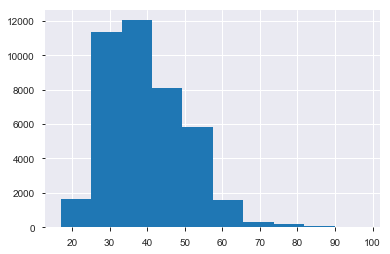

In [15]:
data["age"].hist()

Como se puede observar, la variable edad presenta valores con un rango entre 17 y 98, por otra parte, la media es 40 años, por tanto, parece ser que no hay datos "raros"

## Variable job (trabajo)

In [16]:
## Frecuencia absoluta
#data['job'].describe()

pd.value_counts(data['job'])

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [17]:
## Frecuencia relativa
100 * data['job'].value_counts() / len(data['job'])

admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: job, dtype: float64

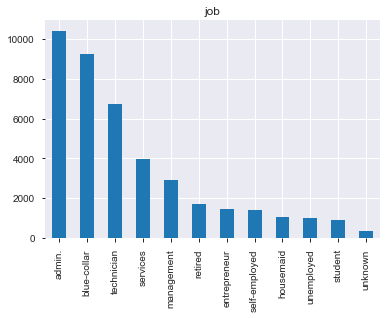

In [18]:
plot_frec_abs = data['job'].value_counts().plot(kind='bar', title='job')

Se puede observar que la variable trabajo presenta una categorìa denominada "unknown", que corresponde al 0,8% , por lo tanto, se procede a eliminar esta categoría.

In [19]:
data=data[data.job!="unknown"]
data2=data[data.job=="student"]

In [20]:
100 * data2['job'].value_counts() / len(data2['job'])

student    100.0
Name: job, dtype: float64

## Variable marital (estado civil)

In [21]:
## Frecuencia absoluta
pd.value_counts(data['marital'])

married     24694
single      11494
divorced     4599
unknown        71
Name: marital, dtype: int64

In [22]:
## Frecuencia relativa
100 * data['marital'].value_counts() / len(data['marital'])

married     60.438592
single      28.131578
divorced    11.256058
unknown      0.173773
Name: marital, dtype: float64

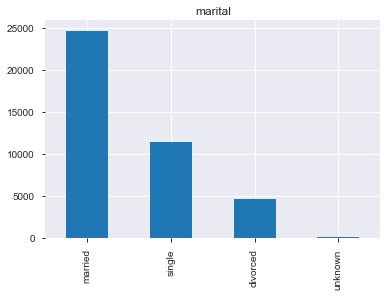

In [23]:
plot_frec_abs = data['marital'].value_counts().plot(kind='bar', title='marital')

Se procede a eliminar la categorìa unknown de la variable marital.

In [24]:
data=data[data.job!="unknown"]

## Variable education (educación)

In [25]:
## Frecuencia absoluta
pd.value_counts(data['education'])

university.degree      12123
high.school             9478
basic.9y                6014
professional.course     5231
basic.4y                4124
basic.6y                2270
unknown                 1600
illiterate                18
Name: education, dtype: int64

In [26]:
## Frecuencia relativa
100 * data['education'].value_counts() / len(data['education'])

university.degree      29.671056
high.school            23.197415
basic.9y               14.719272
professional.course    12.802878
basic.4y               10.093495
basic.6y                5.555828
unknown                 3.916002
illiterate              0.044055
Name: education, dtype: float64

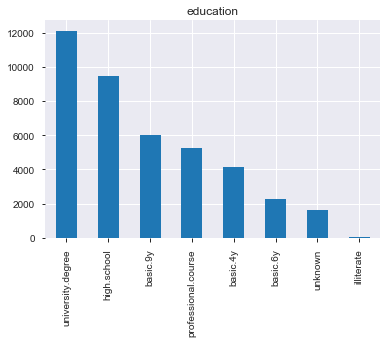

In [27]:
plot_frec_abs = data['education'].value_counts().plot(kind='bar', title='education')

Se procede a eliminar la categorìa unknown de la variable education.

In [28]:
data=data[data.education!="unknown"]

### Variable default, si tiene o no tiene mora

In [29]:
## Frecuencia absoluta
pd.value_counts(data['default'])

no         31284
unknown     7971
yes            3
Name: default, dtype: int64

Esta variable no se debe utilizará para el análisis. ¿Por qué?

### Variable housing (si tiene o no vivienda)

In [30]:
## Frecuencia absoluta
pd.value_counts(data['housing'])

yes        20605
no         17706
unknown      947
Name: housing, dtype: int64

In [31]:
## Frecuencia relativa
100 * data['housing'].value_counts() / len(data['housing'])

yes        52.486117
no         45.101635
unknown     2.412247
Name: housing, dtype: float64

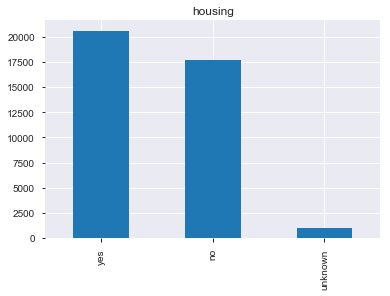

In [32]:
plot_frec_abs = data['housing'].value_counts().plot(kind='bar', title='housing')

Se procede a eliminar la categorìa unknown de la variable housing.

In [33]:
data=data[data.housing!="unknown"]

## Variable loan (si tiene o no prestamo)

In [34]:
## Frecuencia absoluta
pd.value_counts(data['loan'])

no     32344
yes     5967
Name: loan, dtype: int64

In [35]:
## Frecuencia relativa
100 * data['loan'].value_counts() / len(data['loan'])

no     84.424839
yes    15.575161
Name: loan, dtype: float64

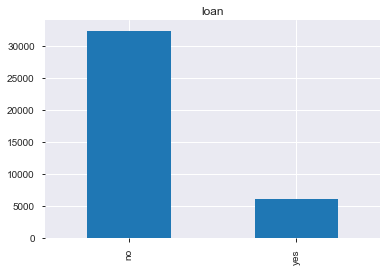

In [36]:
plot_frec_abs = data['loan'].value_counts().plot(kind='bar', title='loan')

## Variables excluidas para la limpieza de los datos

Las siguientes variables fueron excludías del análisis
month (mes) y  duration (duración de la llamada), campaign  ¿Por qué?

## variable contact (tipo de contacto)

In [37]:
## Frecuencia absoluta
pd.value_counts(data['contact'])

cellular     24487
telephone    13824
Name: contact, dtype: int64

In [38]:
## Frecuencia relativa
100 * data['contact'].value_counts() / len(data['contact'])

cellular     63.916369
telephone    36.083631
Name: contact, dtype: float64

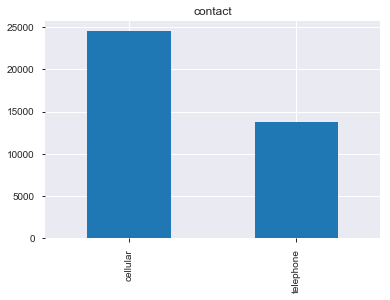

In [39]:
plot_frec_abs = data['contact'].value_counts().plot(kind='bar', title='contact')

## Variable pdays  (dìas transcurridos desde el ùltimo contacto )

In [40]:
data["pdays"].describe()

count    38311.000000
mean       963.463496
std        184.464747
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

Como s puede observar, esta variable es numérica, sin embargo, 999 es un valor que indica que el cliente nunca ha sido contactado, por otra parte, por lo menos el 75 % de los datos indican que los clientes nunca se han tocado ppreviamente, por tanto, no se utilizará esta variable para un futuro análisis, sin embargo, se utilizará la variable previous, que indica la cantidad de veces que se han contactado con el cliente previamente.

##  Variable previous (número de contactos previos al cliente antes de la campaña)

In [41]:
data["previous"].describe()

count    38311.000000
mean         0.170291
std          0.487404
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

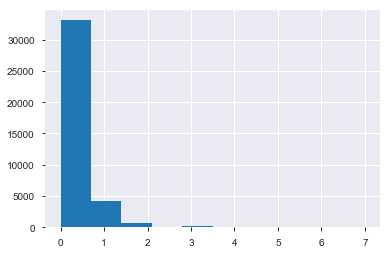

In [42]:
data["previous"].hist()

## Variable poutcome (la campaña anterior fue exitosa o no)

In [43]:
## Frecuencia absoluta
pd.value_counts(data['poutcome'])

nonexistent    33114
failure         3949
success         1248
Name: poutcome, dtype: int64

In [44]:
## Frecuencia relativa
100 * data['poutcome'].value_counts() / len(data['poutcome'])

nonexistent    86.434705
failure        10.307745
success         3.257550
Name: poutcome, dtype: float64

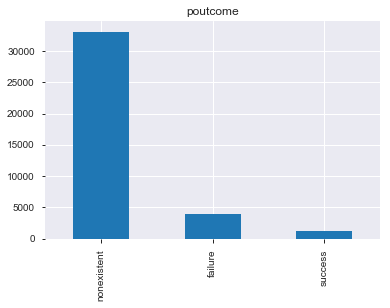

In [45]:
plot_frec_abs = data['poutcome'].value_counts().plot(kind='bar', title='poutcome')

## Variable target

In [46]:
## Frecuencia absoluta
pd.value_counts(data['y'])

no     34044
yes     4267
Name: y, dtype: int64

In [47]:
## Frecuencia relativa
100 * data['y'].value_counts() / len(data['y'])

no     88.862207
yes    11.137793
Name: y, dtype: float64

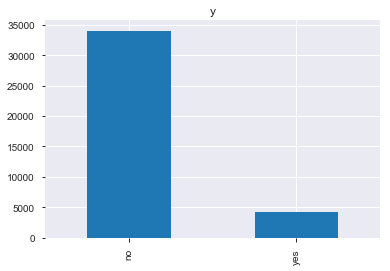

In [48]:
plot_frec_abs = data['y'].value_counts().plot(kind='bar', title='y')

### Selección de variables para el análisis.

In [49]:
data_analisis=data.loc[:, ['age',
'job',
'marital',
'education',
'housing',
'loan',
'contact',
'previous',
'poutcome',
'y']]

## Discretización de la variable edad.

In [50]:
###Función que permite discretizar una variable cuantitativa
def cate(x):
    if x['age']<=32:
        return '32'
    elif x['age']>32 and x['age']<=38:
        return '33-38'
    elif x['age']>38 and x['age']<=47:
        return '38-47'
    elif x['age']>47 and x['age']<=60:
        return '47-60'
    else:
        return '60'
        
##Crear una nueva variable denominada "grupo_edad"
data_analisis['grupo_edad']=data_analisis.apply(cate,axis=1)

In [51]:
##Frecuencia absoluta
pd.value_counts(data_analisis['grupo_edad'])

32       10517
33-38     9462
38-47     9372
47-60     8180
60         780
Name: grupo_edad, dtype: int64

In [52]:
## Frecuencia relativa
100 * data_analisis['grupo_edad'].value_counts() / len(data_analisis['grupo_edad'])

32       27.451646
33-38    24.697867
38-47    24.462948
47-60    21.351570
60        2.035969
Name: grupo_edad, dtype: float64

A continuación, se construye una tabla de contigencia entre la variable grupo edad y la variable y

In [53]:
Tabla = pd.crosstab(index=data_analisis.grupo_edad,columns=data_analisis["y"],margins=True)
Tabla.index= ["32","33-38", "38-47", "47-60", "60", "Total y"] # Para las filas, pero el último elemento es el total de la "columna"
Tabla.columns= ["no", 'yes', "Total_edad"] # Para las columnas, pero el último elemento es el total de la "fila"
Tabla

,no,yes,Total_edad
32,9123,1394,10517
33-38,8508,954,9462
38-47,8645,727,9372
47-60,7339,841,8180
60,429,351,780
Total y,34044,4267,38311


In [54]:
####Frecuencia relativa filas
table2 = Tabla.div(Tabla.Total_edad, axis=0)
table2

,no,yes,Total_edad
32,0.867453,0.132547,1.0
33-38,0.899176,0.100824,1.0
38-47,0.922429,0.077571,1.0
47-60,0.897188,0.102812,1.0
60,0.550000,0.450000,1.0
Total y,0.888622,0.111378,1.0


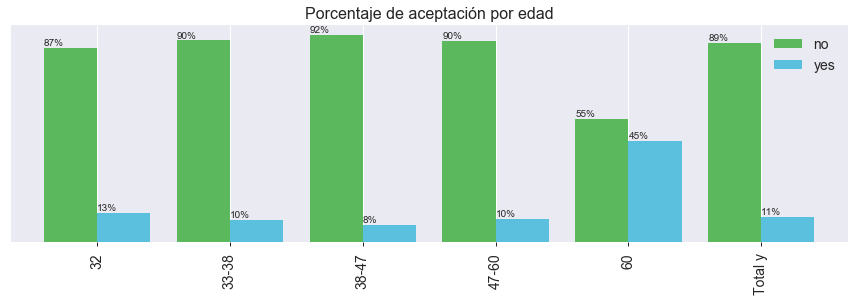

In [55]:
colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Change this line to plot percentages instead of absolute values
ax = (table2[["no", "yes"]]).plot(kind='bar',figsize=(15,4),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=Tabla.columns,fontsize= 14)
plt.title("Porcentaje de aceptación por edad",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))

## Qué conclusiones y que acciones puede obtener del gráfico anterior?

Se pede pensar en realizar una campaña enfocada a las personas mayor a 60 años.

## Análisis con relación a la variable job

In [56]:
Tabla = pd.crosstab(index=data_analisis.job,columns=data_analisis["y"],margins=True)
Tabla.index= ['admin',
'blue-collar',
'entrepreneur',
'housemaid',
'management',
'retired',
'self-employed',
'services',
'student',
'technician',
'unemployed', "Total y"] # Para las filas, pero el último elemento es el total de la "columna"
Tabla.columns= ["no", 'yes', "Total_job"] # Para las columnas, pero el último elemento es el total de la "fila"
Tabla

,no,yes,Total_job
admin,8666,1285,9951
blue-collar,7973,598,8571
entrepreneur,1246,117,1363
housemaid,892,98,990
management,2427,304,2731
retired,1191,391,1582
self-employed,1208,146,1354
services,3424,297,3721
student,481,208,689
technician,5706,685,6391


In [57]:
####Frecuencia relativa filas
table2 = Tabla.div(Tabla.Total_job, axis=0)
table2

,no,yes,Total_job
admin,0.870867,0.129133,1.0
blue-collar,0.930230,0.069770,1.0
entrepreneur,0.914160,0.085840,1.0
housemaid,0.901010,0.098990,1.0
management,0.888685,0.111315,1.0
retired,0.752845,0.247155,1.0
self-employed,0.892171,0.107829,1.0
services,0.920183,0.079817,1.0
student,0.698113,0.301887,1.0
technician,0.892818,0.107182,1.0


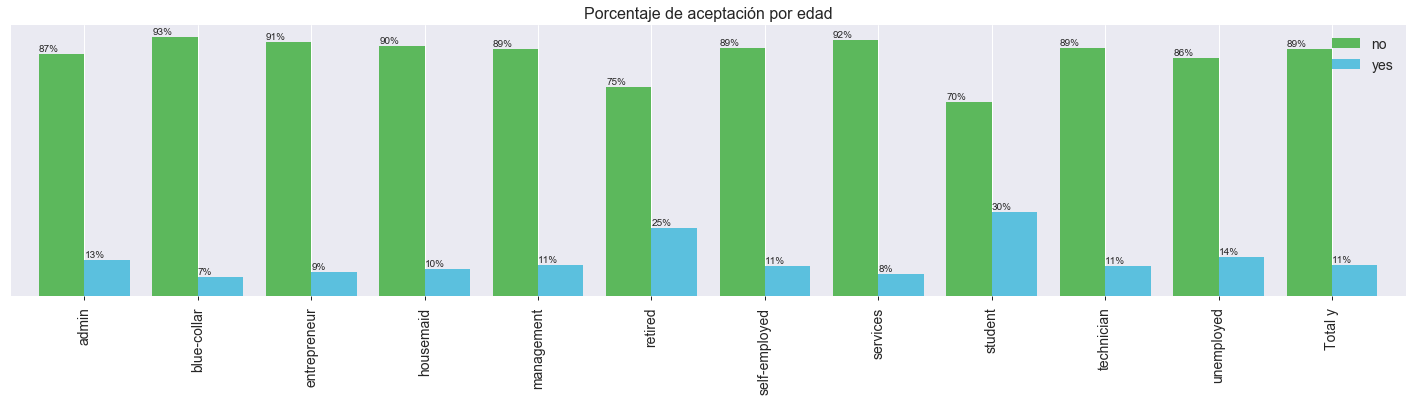

In [58]:
colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Change this line to plot percentages instead of absolute values
ax = (table2[["no", "yes"]]).plot(kind='bar',figsize=(25,5),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=Tabla.columns,fontsize= 14)
plt.title("Porcentaje de aceptación por edad",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))

## Qué conclusiones y que acciones puede obtener del gráfico anterior?

Se puede pensar en realziar campañas enfocadas hacia los estudiantes y los retirados.

## Análisis con relación a la variable tipo de contacto (contact)

In [59]:
Tabla = pd.crosstab(index=data_analisis.contact,columns=data_analisis["y"],margins=True)
Tabla.index= ["cellular","telephone", "Total y"] # Para las filas, pero el último elemento es el total de la "columna"
Tabla.columns= ["no", 'yes', "Total_contact"] # Para las columnas, pero el último elemento es el total de la "fila"
Tabla

,no,yes,Total_contact
cellular,20943,3544,24487
telephone,13101,723,13824
Total y,34044,4267,38311


In [60]:
####Frecuencia relativa filas
table2 = Tabla.div(Tabla.Total_contact, axis=0)
table2

,no,yes,Total_contact
cellular,0.855270,0.144730,1.0
telephone,0.947700,0.052300,1.0
Total y,0.888622,0.111378,1.0


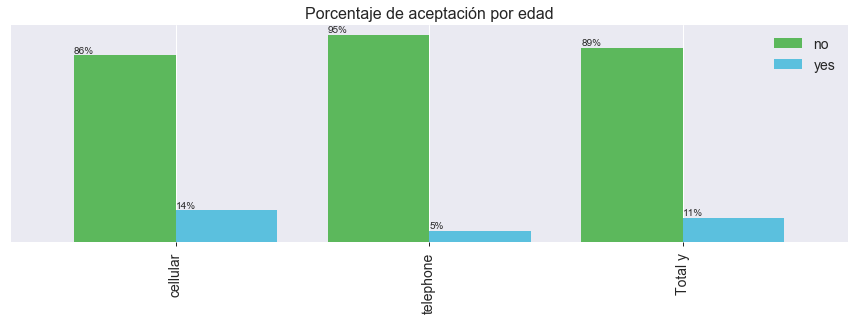

In [61]:
colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Change this line to plot percentages instead of absolute values
ax = (table2[["no", "yes"]]).plot(kind='bar',figsize=(15,4),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=Tabla.columns,fontsize= 14)
plt.title("Porcentaje de aceptación por edad",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
plt.show()

## Qué conclusiones y que acciones puede obtener del gráfico anterior?

Se puede pensar en realziar campañas enfocadas hacia los clientes que tienen celular. Por telefono nno responden mucho.

## Análisis con relación a la variable loan (si tiene crédito o no) 

In [62]:
Tabla = pd.crosstab(index=data_analisis.loan,columns=data_analisis["y"],margins=True)
Tabla.index= ["no","yes", "Total y"] # Para las filas, pero el último elemento es el total de la "columna"
Tabla.columns= ["no", 'yes', "Total_loan"] # Para las columnas, pero el último elemento es el total de la "fila"
Tabla

,no,yes,Total_loan
no,28716,3628,32344
yes,5328,639,5967
Total y,34044,4267,38311


In [63]:
####Frecuencia relativa filas
table2 = Tabla.div(Tabla.Total_loan, axis=0)
table2

,no,yes,Total_loan
no,0.887831,0.112169,1.0
yes,0.892911,0.107089,1.0
Total y,0.888622,0.111378,1.0


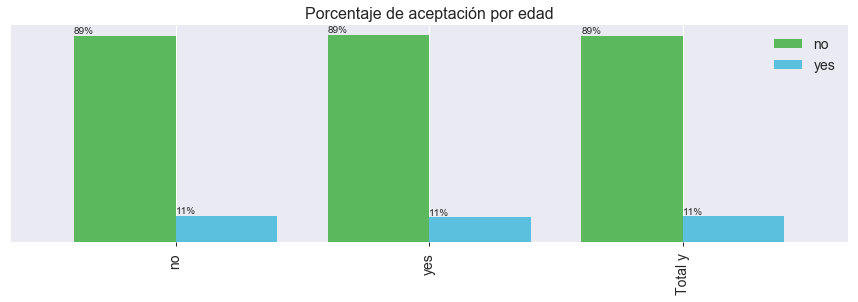

In [64]:
colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Change this line to plot percentages instead of absolute values
ax = (table2[["no", "yes"]]).plot(kind='bar',figsize=(15,4),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=Tabla.columns,fontsize= 14)
plt.title("Porcentaje de aceptación por edad",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))

Analizando el gráfico anterior, se puede observar que la variable loan no influye sobre el porcentaje de aceptación a la campaña.

## Tratamiento de datos para construir distintos modelos de clasificación

In [65]:
##Eliminar la variable grupo_edad
del data_analisis['grupo_edad']
data_analisis.head()

,age,job,marital,education,housing,loan,contact,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,telephone,0,nonexistent,no
1,57,services,married,high.school,no,no,telephone,0,nonexistent,no
2,37,services,married,high.school,yes,no,telephone,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,telephone,0,nonexistent,no
4,56,services,married,high.school,no,yes,telephone,0,nonexistent,no


A continuación, se redefine la variable y de la siguiente forma:

In [66]:
###Función que permite discretizar una variable cuantitativa
def cate(x):
    if x['y']=="yes":
        return 1
    else:
        return '0'
##Crear una nueva variable denominada "grupo_edad"
data_analisis['target']=data_analisis.apply(cate,axis=1)

In [67]:
pd.value_counts(data_analisis["target"])

0    34044
1     4267
Name: target, dtype: int64

In [68]:
del data_analisis["y"]

In [69]:
data_analisis.dtypes

age           int64
job          object
marital      object
education    object
housing      object
loan         object
contact      object
previous      int64
poutcome     object
target       object
dtype: object

In [70]:
data_analisis['target'] = data_analisis['target'].astype(int)

### A continuación se realizar una selección aleatoria de datos de entrenamiento, validación y test. *

Convertir variables categóricas a dummies.

In [71]:
data_model = pd.get_dummies(data_analisis)

In [72]:
data_model.dtypes

age                              int64
previous                         int64
target                           int32
job_admin.                       uint8
job_blue-collar                  uint8
job_entrepreneur                 uint8
job_housemaid                    uint8
job_management                   uint8
job_retired                      uint8
job_self-employed                uint8
job_services                     uint8
job_student                      uint8
job_technician                   uint8
job_unemployed                   uint8
marital_divorced                 uint8
marital_married                  uint8
marital_single                   uint8
marital_unknown                  uint8
education_basic.4y               uint8
education_basic.6y               uint8
education_basic.9y               uint8
education_high.school            uint8
education_illiterate             uint8
education_professional.course    uint8
education_university.degree      uint8
housing_no               

Para cambiar el orden de las variables.

In [73]:
columnsTitles = ["age",                              
"previous",                         
"job_admin.",                       
"job_blue-collar",                  
"job_entrepreneur",                 
"job_housemaid",                    
"job_management",                   
"job_retired" ,                     
"job_self-employed",                
"job_services",                     
"job_student",                      
"job_technician",                   
"job_unemployed",                   
"marital_divorced",                 
"marital_married",                  
"marital_single",                   
"marital_unknown",                  
"education_basic.4y",               
"education_basic.6y",               
"education_basic.9y",               
"education_high.school",            
"education_illiterate",             
"education_professional.course",    
"education_university.degree",      
"housing_no",                      
"housing_yes",                      
"loan_no",                          
"loan_yes",                         
"contact_cellular",               
"contact_telephone",                
"poutcome_failure",                 
"poutcome_nonexistent",             
"poutcome_success",
"target"]

data_model = data_model.reindex(columns=columnsTitles)

In [74]:
data_model.dtypes

age                              int64
previous                         int64
job_admin.                       uint8
job_blue-collar                  uint8
job_entrepreneur                 uint8
job_housemaid                    uint8
job_management                   uint8
job_retired                      uint8
job_self-employed                uint8
job_services                     uint8
job_student                      uint8
job_technician                   uint8
job_unemployed                   uint8
marital_divorced                 uint8
marital_married                  uint8
marital_single                   uint8
marital_unknown                  uint8
education_basic.4y               uint8
education_basic.6y               uint8
education_basic.9y               uint8
education_high.school            uint8
education_illiterate             uint8
education_professional.course    uint8
education_university.degree      uint8
housing_no                       uint8
housing_yes              

A continuación, se realiza una partición sobre la data.

In [75]:
###Partición de la data sobre entrenamiento y validacion.
X, y = data_model.iloc[:,0:33],data_model.iloc[:,33:34]

##Selección data de entrenamiento y test
X_train, X_test_pre, y_train, y_test_pre = train_test_split(X, y, test_size=0.3, random_state=3)

##Selección data de test y developer para tunnear los hiperparámetros
X_dev, X_test, Y_dev, Y_test =  train_test_split(X_test_pre, y_test_pre, test_size=0.5, random_state=3)


## Árboles de decisión

## Para obtener los hiperparámetros de un modelo basado en árboles de decisión

In [76]:
def eval_model(X_train, y_train, X_test, y_test):
    """
    Función para obtener los hiperparámetros del modelo árboles de decisión
    Parámetros: Recibe como parámetros los datos de entrenamiento y los datos de desarrollo.
    únicamente encuentra la mejor combinaciones de los marámetros max depth, mas features,
    max_depth, max_features.       
    """
    vector_n_estimators=[1] ## No es un parametro
    lr_list = [1] # No se va considerar
    vector_max_depth=[1, 2, 3, 4, 5, ] ##si es un parámetro
    max_features=[9, 12, 14] ##si es un parametro
    for r in lr_list:
        for p in vector_max_depth:
            for f in max_features:
                for e in vector_n_estimators:
                    #alg = DecisionTreeClassifier(criterion = "entropy", 
                    #                             random_state = 100,
                    #           max_depth=30, min_samples_leaf=5)
                    #criterion{“gini”, “entropy”}, default=”gini”
                    alg = DecisionTreeClassifier(#n_estimators=e, 
                                                 #learning_rate=r, 
                                                 max_features=f, 
                                                 max_depth=p, 
                                                 random_state=0)
                    ##Inicio del entrenamiento
                    alg.fit(X_train, y_train)
                    # Para comenzar con la prediccion sobre test
                    predictions = alg.predict(X_test)
                    pred_proba = alg.predict_proba(X_test)[:, 1]
                    # Para comenzar con la predicción sobre train
                    predictions_train = alg.predict(X_train)
                    pred_proba_train = alg.predict_proba(X_train)[:, 1]
                    dif_accuracy = abs(metrics.f1_score(y_train, predictions_train) - metrics.f1_score(y_test, predictions))
                    ##Para imprimer las predicciones sobre cada combinación de hiperparámetros.
                    print("#####################################")
                    print("max_depth: ", p, "max_features: ", f)
                    print("#####################################")
                    print("f1_score sobre datos de train")
                    print(metrics.f1_score(y_train, predictions_train))
                    print('f1_score sobre datos de desarrollo')
                    print(metrics.f1_score(y_test, predictions))
                    print("Diferencia entre el f1_score obtenido en test y desarrollo")
                    print(dif_accuracy)
                    
##Para aplicar la fución anterior.  
eval_model(X_train, y_train, X_dev, Y_dev)    

#####################################
max_depth:  1 max_features:  9
#####################################
f1_score sobre datos de train
0.0
f1_score sobre datos de desarrollo
0.0
Diferencia entre el f1_score obtenido en test y desarrollo
0.0
#####################################
max_depth:  1 max_features:  12
#####################################
f1_score sobre datos de train
0.0
f1_score sobre datos de desarrollo
0.0
Diferencia entre el f1_score obtenido en test y desarrollo
0.0
#####################################
max_depth:  1 max_features:  14
#####################################
f1_score sobre datos de train
0.0
f1_score sobre datos de desarrollo
0.0
Diferencia entre el f1_score obtenido en test y desarrollo
0.0
#####################################
max_depth:  2 max_features:  9
#####################################
f1_score sobre datos de train
0.0
f1_score sobre datos de desarrollo
0.0
Diferencia entre el f1_score obtenido en test y desarrollo
0.0
##########################

### Importante: 
Los mejores hiperparámetros encontrados son cuando max_depth = 5 y max features = 14, entonces, se utiliza este modelo, dado que la métrica que consideramos para este ejercicio es el f1 score.

### Función para estimar el modelo basado en árboles con los hiperparámetros seleccionados y aplicarlos sobre la data de test 

Inicio entrenamiento
Iniciar la predicciòn
Metricas al aplicar el modelo sobre los datos de train 
Accuracy sobtr train
0.8990192788156767
AUC sobre train
0.7000667911622379
Matriz de confusion sobre train
[[23543   300]
 [ 2408   566]]
Recall sobre train
0.19031607262945527
Precision sobre train
0.6535796766743649
f1-Score sobre train
0.2947916666666667
Reporte clasificación sobre train
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     23843
           1       0.65      0.19      0.29      2974

    accuracy                           0.90     26817
   macro avg       0.78      0.59      0.62     26817
weighted avg       0.88      0.90      0.87     26817

Metricas al aplicar el modelo sobre los datos de test  
Accuracy sobre test
0.8980337567426483
AUC sobre test
0.6979787755281133
Matriz de confusion sobre test
[[5027   77]
 [ 509  134]]
Recall sobre test
0.208398133748056
Precision sobre test
0.6350710900473934
f1-Score sobre test

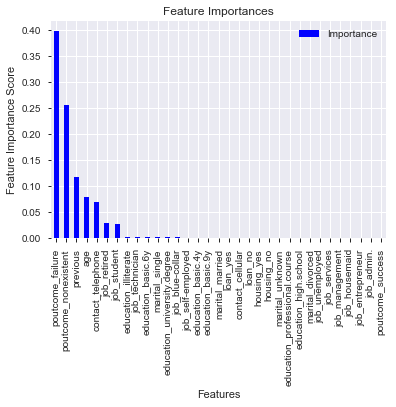

                         Features  Importance
30               poutcome_failure    0.398079
31           poutcome_nonexistent    0.256758
1                        previous    0.117899
0                             age    0.080251
29              contact_telephone    0.069389
7                     job_retired    0.030358
10                    job_student    0.028649
21           education_illiterate    0.002552
11                 job_technician    0.002223
18             education_basic.6y    0.002148
15                 marital_single    0.002132
23    education_university.degree    0.002016
3                 job_blue-collar    0.001943
8               job_self-employed    0.001593
17             education_basic.4y    0.001544
19             education_basic.9y    0.001456
14                marital_married    0.001008
27                       loan_yes    0.000000
28               contact_cellular    0.000000
26                        loan_no    0.000000
25                    housing_yes 

In [87]:
def tree_classifier(X_train, X_test, y_train, y_test):
    """
    Función para estimar un modelo utilizando árboles de decisión 
    Esta funciòn recibe como parametros los datos de entrenamiento y de test
    Finalmente, imprime el AUC, f1-score, precision, recall, accuracy
    por cada clase, tanto para la data de entrenamiento, como la de test.
    Finaalmente, esta función también imprime la importancia de las variables.
       
    """
    alg = DecisionTreeClassifier(#n_estimators=e, 
                                                 #learning_rate=r, 
                                                 max_features=14, 
                                                 max_depth=5, 
                                                 random_state=0)
    # Entrenamiento
    print('Inicio entrenamiento')
    alg.fit(X_train, y_train)
    # Guardar el modelo en disco en el siguiente directorio
    # save the model to disk
    #%cd C:\Users\\USUARIO\\Documents\\Monitoria_cda_2019_2\\Clases_Python\\Clase8_Python
    #filename = 'finalized_model.sav'
    #joblib.dump(alg, filename)

    # Para comenzar con la prediccion
    print("Iniciar la predicciòn")
    predictions = alg.predict(X_test)
    pred_proba = alg.predict_proba(X_test)[:, 1]
    
    predictions_train = alg.predict(X_train)
    pred_proba_train = alg.predict_proba(X_train)[:, 1]
    
    #Para imprimir las metricas al aplicar el modelo sobre los datos de train
    
    # Para imprimir las métricas al aplicar el modelo sobre los datos de test
    print("Metricas al aplicar el modelo sobre los datos de train ")
    print("Accuracy sobtr train")
    print(metrics.accuracy_score(y_train, predictions_train))
    print("AUC sobre train")
    print(metrics.roc_auc_score(y_train, pred_proba_train))
    print("Matriz de confusion sobre train")
    print(confusion_matrix(y_train, predictions_train))
    print("Recall sobre train")
    print(metrics.recall_score(y_train, predictions_train))
    print("Precision sobre train")
    print(metrics.precision_score(y_train, predictions_train))
    print("f1-Score sobre train")
    print( metrics.f1_score(y_train, predictions_train))
    print("Reporte clasificación sobre train")
    print(classification_report(y_train, predictions_train))

    # Para imprimir las métricas al aplicar el modelo sobre los datos de test
    print("Metricas al aplicar el modelo sobre los datos de test  ")
    print("Accuracy sobre test")
    print(metrics.accuracy_score(y_test, predictions))
    print("AUC sobre test")
    print(metrics.roc_auc_score(y_test, pred_proba))
    print("Matriz de confusion sobre test")
    print(confusion_matrix(y_test, predictions))
    print("Recall sobre test")
    print(metrics.recall_score(y_test, predictions))
    print("Precision sobre test")
    print(metrics.precision_score(y_test, predictions))
    print("f1-Score sobre test")
    print( metrics.f1_score(y_test, predictions))
    print("Reporte clasificación sobre test")
    print(classification_report(y_test, predictions))
    
    feat_imp = alg.feature_importances_
    feat = X_train.columns.tolist()
    # clf.best_estimator_.booster().get_fscore()
    res_df = pd.DataFrame({'Features': feat, 'Importance': feat_imp}).sort_values(by='Importance', ascending=False)
    res_df.plot('Features', 
                'Importance', 
                kind='bar', 
                title='Feature Importances',
                color= "blue")
    plt.ylabel('Feature Importance Score')
    plt.show()
    print(res_df)
    print(res_df["Features"].tolist())

    return alg
alg = tree_classifier(X_train, X_test, y_train, Y_test)

## Random Forest 

### Para obtener los hiperparámetros de un modelo random forest

In [78]:
def eval_model(X_train, y_train, X_test, y_test):
    """
    Función para obtener los hiperparámetros del modelo random forest.
    Parámetros: Recibe como parámetros los datos de entrenamiento y los datos de desarrollo.
    únicamente encuentra la mejor combinaciones de los marámetros n_estimators, learning_rate,
    max_depth, max_features.       
    """
    vector_n_estimators=[40, 60, 100]  ## si va
    lr_list = [1]   ## No va
    vector_max_depth=[3, 6, 9]  ## si va
    max_features=[9, 12, 14] ## si va
    for r in lr_list:
        for p in vector_max_depth:
            for f in max_features:
                for e in vector_n_estimators:
                    alg = RandomForestClassifier(n_estimators=e, 
                                                     #learning_rate=r, 
                                                     max_features=f, 
                                                     max_depth=p, 
                                                     random_state=0)
                    ##Inicio del entrenamiento
                    alg.fit(X_train, y_train)
                    # Para comenzar con la prediccion sobre test
                    predictions = alg.predict(X_test)
                    pred_proba = alg.predict_proba(X_test)[:, 1]
                    # Para comenzar con la predicción sobre train
                    predictions_train = alg.predict(X_train)
                    pred_proba_train = alg.predict_proba(X_train)[:, 1]
                    dif_accuracy = abs(metrics.f1_score(y_train, predictions_train) - metrics.f1_score(y_test, predictions))
                    ##Para imprimer las predicciones sobre cada combinación de hiperparámetros.
                    print("#####################################")
                    print("max_depth: ", p, "max_features: ", f, "n_estimators: ", e)
                    print("#####################################")
                    print("f1_score sobre datos de train")
                    print(metrics.f1_score(y_train, predictions_train))
                    print('f1_score sobre datos de desarrollo')
                    print(metrics.f1_score(y_test, predictions))
                    print("Diferencia entre el f1_score obtenido en test y desarrollo")
                    print(dif_accuracy)
                    
##Para aplicar la fución anterior.  
eval_model(X_train, y_train, X_dev, Y_dev)  

#####################################
max_depth:  3 max_features:  9 n_estimators:  40
#####################################
f1_score sobre datos de train
0.18810430706123646
f1_score sobre datos de desarrollo
0.18741633199464527
Diferencia entre el f1_score obtenido en test y desarrollo
0.0006879750665911843
#####################################
max_depth:  3 max_features:  9 n_estimators:  60
#####################################
f1_score sobre datos de train
0.21381484666093437
f1_score sobre datos de desarrollo
0.2199223803363519
Diferencia entre el f1_score obtenido en test y desarrollo
0.006107533675417526
#####################################
max_depth:  3 max_features:  9 n_estimators:  100
#####################################
f1_score sobre datos de train
0.18762826150688947
f1_score sobre datos de desarrollo
0.19174434087882825
Diferencia entre el f1_score obtenido en test y desarrollo
0.00411607937193878
#####################################
max_depth:  3 max_features:  12 

### Importante 
Los mejores hiperparámetros para el random forest son: max_depth:  9 max_features:  12 n_estimators:  100

### Función para estimar el modelo basado en random forest con los hiperparámetros seleccionados y aplicarlos sobre la data de test 

Inicio entrenamiento
Iniciar la predicciòn
Metricas al aplicar el modelo sobre los datos de train 
Accuracy sobtr train
0.9053212514449789
AUC sobre train
0.7610954334453236
Matriz de confusion sobre train
[[23657   186]
 [ 2353   621]]
Recall sobre train
0.20880968392737054
Precision sobre train
0.7695167286245354
f1-Score sobre train
0.3284845279026713
Reporte clasificación sobre train
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     23843
           1       0.77      0.21      0.33      2974

    accuracy                           0.91     26817
   macro avg       0.84      0.60      0.64     26817
weighted avg       0.89      0.91      0.88     26817

Metricas al aplicar el modelo sobre los datos de test  
Accuracy sobre test
0.8971637376022272
AUC sobre test
0.7172916859645959
Matriz de confusion sobre test
[[5028   76]
 [ 515  128]]
Recall sobre test
0.19906687402799378
Precision sobre test
0.6274509803921569
f1-Score sobre te

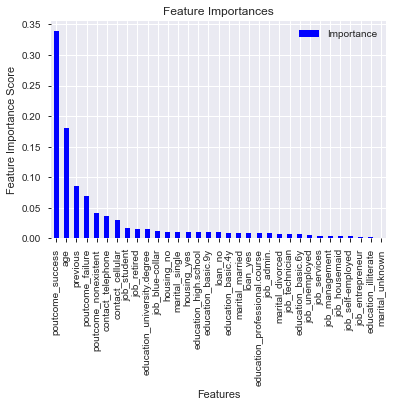

                         Features  Importance
32               poutcome_success    0.338809
0                             age    0.181070
1                        previous    0.086416
30               poutcome_failure    0.069595
31           poutcome_nonexistent    0.042331
29              contact_telephone    0.036876
28               contact_cellular    0.030048
10                    job_student    0.017725
7                     job_retired    0.014704
23    education_university.degree    0.014647
3                 job_blue-collar    0.012363
24                     housing_no    0.011102
15                 marital_single    0.010796
25                    housing_yes    0.010592
20          education_high.school    0.010471
19             education_basic.9y    0.010276
26                        loan_no    0.009930
17             education_basic.4y    0.009279
14                marital_married    0.009191
27                       loan_yes    0.009171
22  education_professional.course 

In [79]:
def tree_classifier(X_train, X_test, y_train, y_test):
    """
    Función para estimar un modelo utilizando random forest 
    Esta funciòn recibe como parametros los datos de entrenamiento y de test
    Finalmente, imprime el AUC, f1-score, precision, recall, accuracy
    por cada clase, tanto para la data de entrenamiento, como la de test.
    Finaalmente, esta función también imprime la importancia de las variables.
       
    """
    alg = RandomForestClassifier(n_estimators=100, 
                                #learning_rate=r, 
                                max_features=12, 
                                max_depth=9, 
                                random_state=0)
    # Entrenamiento
    print('Inicio entrenamiento')
    alg.fit(X_train, y_train)
    # Guardar el modelo en disco en el siguiente directorio
    # save the model to disk
    #%cd C:\Users\\USUARIO\\Documents\\Monitoria_cda_2019_2\\Clases_Python\\Clase8_Python
    #filename = 'finalized_model.sav'
    #joblib.dump(alg, filename)

    # Para comenzar con la prediccion
    print("Iniciar la predicciòn")
    predictions = alg.predict(X_test)
    pred_proba = alg.predict_proba(X_test)[:, 1]
    
    predictions_train = alg.predict(X_train)
    pred_proba_train = alg.predict_proba(X_train)[:, 1]
    
    #Para imprimir las metricas al aplicar el modelo sobre los datos de train
    
    # Para imprimir las métricas al aplicar el modelo sobre los datos de test
    print("Metricas al aplicar el modelo sobre los datos de train ")
    print("Accuracy sobtr train")
    print(metrics.accuracy_score(y_train, predictions_train))
    print("AUC sobre train")
    print(metrics.roc_auc_score(y_train, pred_proba_train))
    print("Matriz de confusion sobre train")
    print(confusion_matrix(y_train, predictions_train))
    print("Recall sobre train")
    print(metrics.recall_score(y_train, predictions_train))
    print("Precision sobre train")
    print(metrics.precision_score(y_train, predictions_train))
    print("f1-Score sobre train")
    print( metrics.f1_score(y_train, predictions_train))
    print("Reporte clasificación sobre train")
    print(classification_report(y_train, predictions_train))

    # Para imprimir las métricas al aplicar el modelo sobre los datos de test
    print("Metricas al aplicar el modelo sobre los datos de test  ")
    print("Accuracy sobre test")
    print(metrics.accuracy_score(y_test, predictions))
    print("AUC sobre test")
    print(metrics.roc_auc_score(y_test, pred_proba))
    print("Matriz de confusion sobre test")
    print(confusion_matrix(y_test, predictions))
    print("Recall sobre test")
    print(metrics.recall_score(y_test, predictions))
    print("Precision sobre test")
    print(metrics.precision_score(y_test, predictions))
    print("f1-Score sobre test")
    print( metrics.f1_score(y_test, predictions))
    print("Reporte clasificación sobre test")
    print(classification_report(y_test, predictions))
    
    feat_imp = alg.feature_importances_
    feat = X_train.columns.tolist()
    # clf.best_estimator_.booster().get_fscore()
    res_df = pd.DataFrame({'Features': feat, 'Importance': feat_imp}).sort_values(by='Importance', ascending=False)
    res_df.plot('Features', 
                'Importance', 
                kind='bar', 
                title='Feature Importances',
                color= "blue")
    plt.ylabel('Feature Importance Score')
    plt.show()
    print(res_df)
    print(res_df["Features"].tolist())

tree_classifier(X_train, X_test, y_train, Y_test)

## Gradient Boosting

### Función para obtener los hiperparámetros de un modelo gradient boosting

In [80]:
def eval_model(X_train, y_train, X_test, y_test):
    """
    Función para obtener los hiperparámetros del modelo gradient boosting.
    Parámetros: Recibe como parámetros los datos de entrenamiento y los datos de desarrollo.
    únicamente encuentra la mejor combinaciones de los marámetros n_estimators, learning_rate,
    max_depth, max_features.       
    """
    vector_n_estimators=[40, 80, 100]
    lr_list = [0.3]
    vector_max_depth=[3, 5]
    max_features=[9, 12]
    for r in lr_list:
        for p in vector_max_depth:
            for f in max_features:
                for e in vector_n_estimators:
                    alg = GradientBoostingClassifier(n_estimators=e, 
                                                     learning_rate=r, 
                                                     max_features=f, 
                                                     max_depth=p, 
                                                     random_state=0)
                    ##Inicio del entrenamiento
                    alg.fit(X_train, y_train)
                    # Para comenzar con la prediccion sobre test
                    predictions = alg.predict(X_test)
                    pred_proba = alg.predict_proba(X_test)[:, 1]
                    # Para comenzar con la predicción sobre train
                    predictions_train = alg.predict(X_train)
                    pred_proba_train = alg.predict_proba(X_train)[:, 1]
                    dif_accuracy = abs(metrics.f1_score(y_train, predictions_train) - metrics.f1_score(y_test, predictions))
                    ##Para imprimer las predicciones sobre cada combinación de hiperparámetros.
                    print("#####################################")
                    print("learning_rate: ", r , "max_depth: ", p, "max_features: ", f, "n_estimators: ", e)
                    print("f1_score sobre datos de train")
                    print(metrics.f1_score(y_train, predictions_train))
                    print('f1_score sobre datos de desarrollo')
                    print(metrics.f1_score(y_test, predictions))
                    print("Diferencia entre el f1_score obtenido en test y desarrollo")
                    print(dif_accuracy)
                    
##Para aplicar la fución anterior.  
eval_model(X_train, y_train, X_dev, Y_dev)    

#####################################
learning_rate:  0.3 max_depth:  3 max_features:  9 n_estimators:  40
f1_score sobre datos de train
0.29365079365079366
f1_score sobre datos de desarrollo
0.27294685990338163
Diferencia entre el f1_score obtenido en test y desarrollo
0.02070393374741203
#####################################
learning_rate:  0.3 max_depth:  3 max_features:  9 n_estimators:  80
f1_score sobre datos de train
0.31070496083550914
f1_score sobre datos de desarrollo
0.28672985781990523
Diferencia entre el f1_score obtenido en test y desarrollo
0.023975103015603905
#####################################
learning_rate:  0.3 max_depth:  3 max_features:  9 n_estimators:  100
f1_score sobre datos de train
0.31835886782653855
f1_score sobre datos de desarrollo
0.2806183115338882
Diferencia entre el f1_score obtenido en test y desarrollo
0.03774055629265033
#####################################
learning_rate:  0.3 max_depth:  3 max_features:  12 n_estimators:  40
f1_score sobre dat

### Importante 
Los mejores hiperparámetros son 
learning_rate:  0.3 max_depth:  5 max_features:  12 n_estimators:  40

### Función para estimar el modelo basado en gradient boosting y aplicarlo sobre los datos de test.

In [81]:
def xgb_classifier(X_train, X_test, y_train, y_test):
    """
    Función para estimar un modelo utilizando gradient boosting machine (esemble)
    Esta funciòn recibe como parametros los datos de entrenamiento y de test
    Finalmente, imprime el AUC, f1-score, precision, recall, accuracy
    por cada clase, tanto para la data de entrenamiento, como la de test.
    Finaalmente, esta función también imprime la importancia de las variables.
       
    """
    alg = GradientBoostingClassifier(n_estimators=40, 
                                     learning_rate=0.3, 
                                     max_features=12, 
                                     max_depth=5, random_state=0)
    # Entrenamiento
    print('Inicio entrenamiento')
    alg.fit(X_train, y_train)
    # Guardar el modelo en disco en el siguiente directorio
    # save the model to disk
    #%cd C:\Users\\USUARIO\\Documents\\Monitoria_cda_2019_2\\Clases_Python\\Clase8_Python
    #filename = 'finalized_model.sav'
    #joblib.dump(alg, filename)

    # Para comenzar con la prediccion
    print("Iniciar la predicciòn")
    predictions = alg.predict(X_test)
    pred_proba = alg.predict_proba(X_test)[:, 1]
    
    predictions_train = alg.predict(X_train)
    pred_proba_train = alg.predict_proba(X_train)[:, 1]
    
    #Para imprimir las metricas al aplicar el modelo sobre los datos de train
    
    # Para imprimir las métricas al aplicar el modelo sobre los datos de test
    print("Metricas al aplicar el modelo sobre los datos de train ")
    print("Accuracy sobtr train")
    print(metrics.accuracy_score(y_train, predictions_train))
    print("AUC sobre train")
    print(metrics.roc_auc_score(y_train, pred_proba_train))
    print("Matriz de confusion sobre train")
    print(confusion_matrix(y_train, predictions_train))
    print("Recall sobre train")
    print(metrics.recall_score(y_train, predictions_train))
    print("Precision sobre train")
    print(metrics.precision_score(y_train, predictions_train))
    print("f1-Score sobre train")
    print( metrics.f1_score(y_train, predictions_train))
    print("Reporte clasificación sobre train")
    print(classification_report(y_train, predictions_train))

    # Para imprimir las métricas al aplicar el modelo sobre los datos de test
    print("Metricas al aplicar el modelo sobre los datos de test  ")
    print("Accuracy sobre test")
    print(metrics.accuracy_score(y_test, predictions))
    print("AUC sobre test")
    print(metrics.roc_auc_score(y_test, pred_proba))
    print("Matriz de confusion sobre test")
    print(confusion_matrix(y_test, predictions))
    print("Recall sobre test")
    print(metrics.recall_score(y_test, predictions))
    print("Precision sobre test")
    print(metrics.precision_score(y_test, predictions))
    print("f1-Score sobre test")
    print( metrics.f1_score(y_test, predictions))
    print("Reporte clasificación sobre test")
    print(classification_report(y_test, predictions))
    
    feat_imp = alg.feature_importances_
    feat = X_train.columns.tolist()
    # clf.best_estimator_.booster().get_fscore()
    res_df = pd.DataFrame({'Features': feat, 'Importance': feat_imp}).sort_values(by='Importance', ascending=False)
    res_df.plot('Features', 
                'Importance', 
                kind='bar', 
                title='Feature Importances',
                color= "blue")
    plt.ylabel('Feature Importance Score')
    plt.show()
    print(res_df)
    print(res_df["Features"].tolist())

Inicio entrenamiento
Iniciar la predicciòn
Metricas al aplicar el modelo sobre los datos de train 
Accuracy sobtr train
0.9065518141477421
AUC sobre train
0.7552836602792291
Matriz de confusion sobre train
[[23644   199]
 [ 2307   667]]
Recall sobre train
0.2242770679219906
Precision sobre train
0.7702078521939953
f1-Score sobre train
0.34739583333333335
Reporte clasificación sobre train
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     23843
           1       0.77      0.22      0.35      2974

    accuracy                           0.91     26817
   macro avg       0.84      0.61      0.65     26817
weighted avg       0.90      0.91      0.88     26817

Metricas al aplicar el modelo sobre los datos de test  
Accuracy sobre test
0.8952496954933008
AUC sobre test
0.7114185135800544
Matriz de confusion sobre test
[[5017   87]
 [ 515  128]]
Recall sobre test
0.19906687402799378
Precision sobre test
0.5953488372093023
f1-Score sobre te

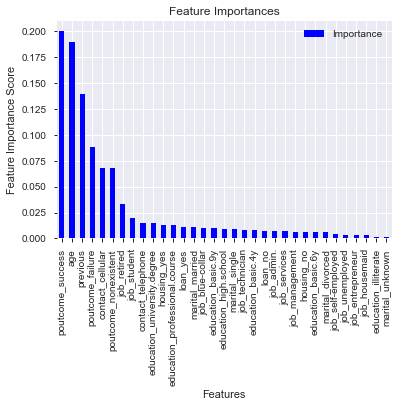

                         Features  Importance
32               poutcome_success    0.200023
0                             age    0.189984
1                        previous    0.139392
30               poutcome_failure    0.088512
28               contact_cellular    0.068157
31           poutcome_nonexistent    0.067661
7                     job_retired    0.032851
10                    job_student    0.019278
29              contact_telephone    0.015308
23    education_university.degree    0.014946
25                    housing_yes    0.012872
22  education_professional.course    0.012623
27                       loan_yes    0.010765
14                marital_married    0.010745
3                 job_blue-collar    0.010212
19             education_basic.9y    0.010147
20          education_high.school    0.009059
15                 marital_single    0.008970
11                 job_technician    0.007858
17             education_basic.4y    0.007839
26                        loan_no 

In [82]:
xgb_classifier(X_train, X_test, y_train, Y_test)

## Laboratorio para entregar

## Puntos asociados al laboratorio 7
1. ¿Qué clase de algoritmo implementa sklearn? ¿CHAID o ID3?
2. ¿Que otros hiperparámetros utilizan los árboles de decisión? ¿Para que sirve cada uno?

## Puntos asociados al laboratorio 8
1. Teniendo en cuenta los resultados de los modelos basados en árboles de decisión, random forest y gradient boosting ¿cuál modelo seleccionaría usted? justifica su respuesta.
2. ¿Cómo utilizaría el modelo seleccionado para una futura campaña de venta de productos?

## Puntos adicionales -> Opcional.
1. Investigar cómo interpretar los modelos de "caja negra", para ello, puede consultar los singuientes links.
https://www.explorium.ai/blog/interpretability-and-explainability-part-1/
https://www.explorium.ai/blog/interpretability-and-explainability-part-2/ 
2. Para el modelo seleccionado, pinte un gráfico de dependencia parcial para las variables más importantes e interprete los resultados.
3. Para el modelo seleccionado, pinte un gráfico de para estudiar los Shapley Values.

<h1> Tarea</h1>
<h2>Lab 7</h2>
<h4> 1. ¿Qué clase de algoritmo implementa sklearn? ¿CHAID o ID3? </h4>
<p>Se encontro en la pagina de scikit learn la informacion referente a <a href="https://scikit-learn.org/stable/modules/tree.html">Arboles de desicion</a> Presentada a continuación. En esta explicitamente se explica que el algorithmo utilizado es el de CART el cual es una versión opimizada de C4.5  </p>
<img src="destree.png" width=2000 height=2000 />

<h4>2. ¿Que otros hiperparámetros utilizan los árboles de decisión? ¿Para que sirve cada uno?</h4>
<img src="hyperparam.png" width=2000 height=2000 />
<ul>
    <li>criterion{“gini”, “entropy”}, default=”gini”: Son las funciones con las que se mide la calidad de la separación de los datos para cada nodo </li>
    <li>splitter{“best”, “random”}, default=”best”:  la estrategia  usada para la separación en cada nodo, "best" mejor selección segun evaluavion de las psobles separaciones o random, eleccion alaeatorea de la separacion. </li>
    <li>max_depthint, default=None: la máxima profundidad del arbol. Es un hyperparametro  importante para que no se sobrejuste el arbol al impedir que este siga creciendo hasta determinar la mejor partición para cada dato del que aprende </li>
    <li>min_samples_splitint or float, default=2: el minimo numero de datos con el cual el arbol puede realizar la separacíon. Este es otro hyperparametro que sirve para evitar el sbre ajuste. Por defecto tiene 2  olo que implica que va a realizar la separacion hasta que queden un hoja con un dato. Esto anterior regula para evitar el sobre ajuste, además evita que una desición o regla este derteminada por muestras pequeñas, que podrian no ser regla que se puedan generalizar</li>
    <li>min_samples_leafint or float, default=1: minimo de datos requerido que exista en las hojas. Funciona similara al anterior al limitar la existencia de una deciciono regla final determinada por poca cantidad de datos./li>
    <li>min_weight_fraction_leaffloat, default=0.0: la minima fraccion de los pesos  de la suma total de los pesos de todas las variables de entrada que puede existir en cada hoja. por defecto todas las muestras tiene un mismo peso .</li>
    <li>max_featuresint, float or {“auto”, “sqrt”, “log2”}, default=None: el numero de caracteristicas  que se consideraran al momento de considerar la mejor forma de realizar la separación</li>
    <li>random_stateint, RandomState instance, default=None: Controla la aleatoridad de los estimadores. Las caracteristicaas son siempre permutadas en cada separación. Para obtener un resultado deterministico se debe seleccionar un valor entero.</li>
    <li>max_leaf_nodesint, default=None: la maxima cantidad de nodos hojas que pueden existir.Sirve tambien para regularizar, al impedir que se ajuste el arbol a los datos de entrenamiento.</li>
    <li>min_impurity_decreasefloat, default=0.0:Para realizar la separacion se limita esta a que exista un minimo en el decrecimiento de la impuridad de la separacion para que se pueda dar.</li>
    <li>class_weightdict, list of dict or “balanced”, default=None: Los pesos/importancia, que se le da a las classes.Este metodo puede pririzar siertas clases demanera que el modelo no se vea sesgado por las frecuencias de las clases en la clase de entrenamiento.Existe el metod "blanced" el cual logra lo anterior basandose en las frecuencias de cada clase en la data de entrenamiento.</li>
    <li>ccp_alphanon-negative float, default=0.0: Complexidad del parametro usado para el costo  de complexidad minimo para la poda. Por defecto no hay poda-</li>

</ul>

<h4> los anteriores son para un arbol de desicion clasificardo, para el caso de un arbol de desicion regresos se tiene la siguiente diferencia:</h4>
<ul>
    <li>criterion{“mse”, “friedman_mse”, “mae”}, default=”mse”:son las funnciones con las que se mide la calidad de la separación.</li>


</ul>



<p>Todo lo anterior fue sacado de la pagina para <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier">arboles de decision decision</a>.</p>

<h2>Lab 8 </h2>
<h4>1. Teniendo en cuenta los resultados de los modelos basados en árboles de decisión, random forest y gradient boosting ¿cuál modelo seleccionaría usted? justifica su respuesta.</h4>


<p>No se observa mucha dferencia entre los resultados de los modelos. Los modelo aplicados al conjunto test se comportan mejor en terminos de presicion en el caso de random forest y gradient boosting en comparacion de el arbol de desicion. En el caso de la evaluacion en el conjunto test el caso observale es el contrario. Es importante resltar que esta diferencia en las metricas de los modelos  no se entiende que pueda ser suficientement difernte  por lo que  una primera conclusión es  que los modelos se comportan muy similar. En terminos explícitos el arbol de desición  presenta una mejor presición  que los demás modelos  por lo que si se tomase  como desición esta metrica, el mejor modelo seria un arbol de desicion. Pero teniendo en cuenta lo mencionado anteriomente  puede ser el caso que esta diferenia  en la presicion , sensiblidad y F-score  no sea suficente para determinar que relmente los modelos se comportan difernte  y que uno sea mejor que otro.
    
Siguiendo el criterio de "Occam´s razor" para este caso  se piensa que el mejor modelo seria  el arbol de desicion , en terminos de que este es mas simple que los otros dos (menos complejo). Otro beneficio derivado de seleccionar el arbol de desicion bajo el supuesto  de que los modelo no so muy difrentes , es el de tener un modelo del cual se puede extraer conocimientos de como el modelo esta funcionando(las reglas que esta usando) de una manera mas simple para las personas. 

<h4>2. ¿Cómo utilizaría el modelo seleccionado para una futura campaña de venta de productos?</h4>


<p>Primeramente, y siguiendo el deseo de los dueños de los datos , se implementaria este modelo para determinar quienes tiene la posibilidad de suscribirse a depósito a termino. Con esta inforación  generar camapañas enfocada en todas aquellas personas que el modelo prediga si se suscribe. Por otro lado, estos modelos permiten entender la importancia de las variables sobre la prediccion de la avariable ojetivo. Esta informacion puede permitir un enfoque en el tipo de la campaña, por ejemplo la edad. En este caso conociendo la edad se puede enfocar campañas entendiendo el comportamiento demografico de las persona en segmentos de edad: les gusta ir mas a restaurantes o les gusta ir mas a bares y generar una campaña que venda el producto involucrando  tipos de actividades que diferentes segmentos de edad pueden usar. </p>

## Puntos adicionales -> Opcional.
1. Investigar cómo interpretar los modelos de "caja negra", para ello, puede consultar los singuientes links.
https://www.explorium.ai/blog/interpretability-and-explainability-part-1/
https://www.explorium.ai/blog/interpretability-and-explainability-part-2/ 
2. Para el modelo seleccionado, pinte un gráfico de dependencia parcial para las variables más importantes e interprete los resultados.
3. Para el modelo seleccionado, pinte un gráfico de para estudiar los Shapley Values.

In [84]:
from pdpbox import pdp, get_dataset

In [85]:
X_test.columns

Index(['age', 'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [88]:
pdp_rad = pdp.pdp_isolate(model=alg, dataset=X_test, model_features=X_test.columns, feature='poutcome_failure')

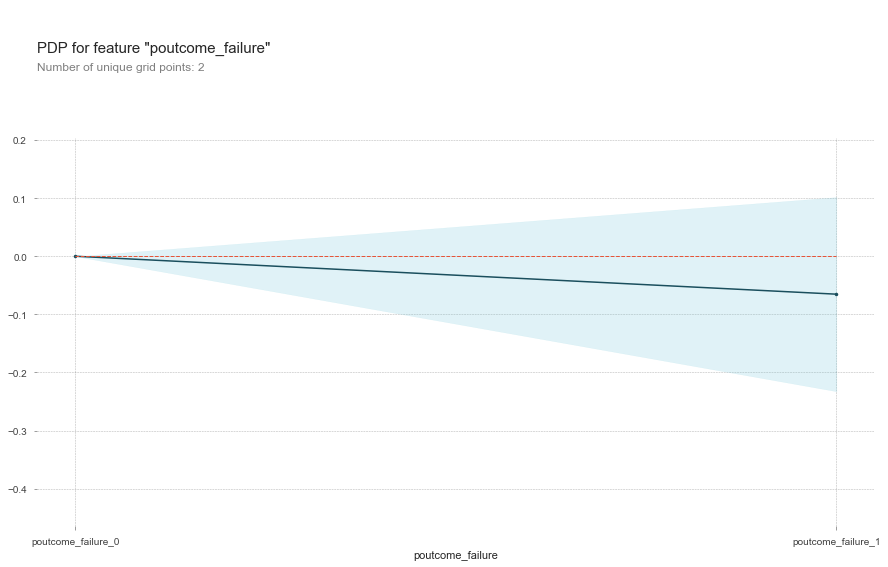

In [90]:
pdp.pdp_plot(pdp_rad, 'poutcome_failure')
plt.show()

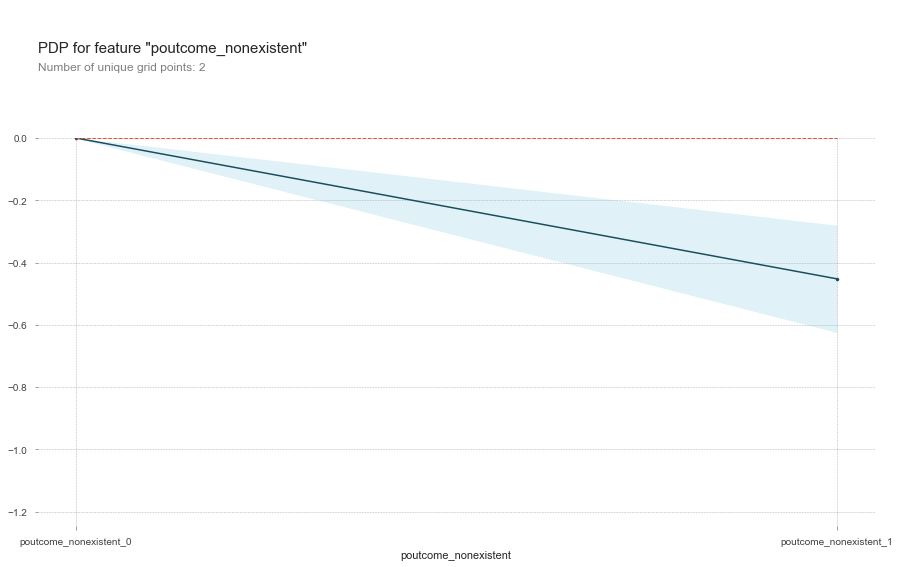

In [91]:
pdp_rad = pdp.pdp_isolate(model=alg, dataset=X_test, model_features=X_test.columns, feature='poutcome_nonexistent')
pdp.pdp_plot(pdp_rad, 'poutcome_nonexistent')
plt.show()

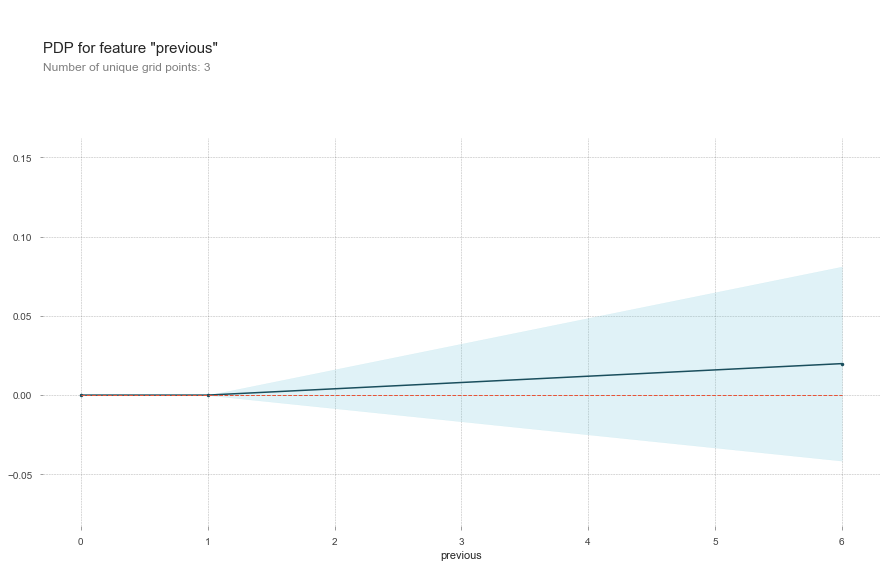

In [92]:
pdp_rad = pdp.pdp_isolate(model=alg, dataset=X_test, model_features=X_test.columns, feature='previous')
pdp.pdp_plot(pdp_rad, 'previous')
plt.show()

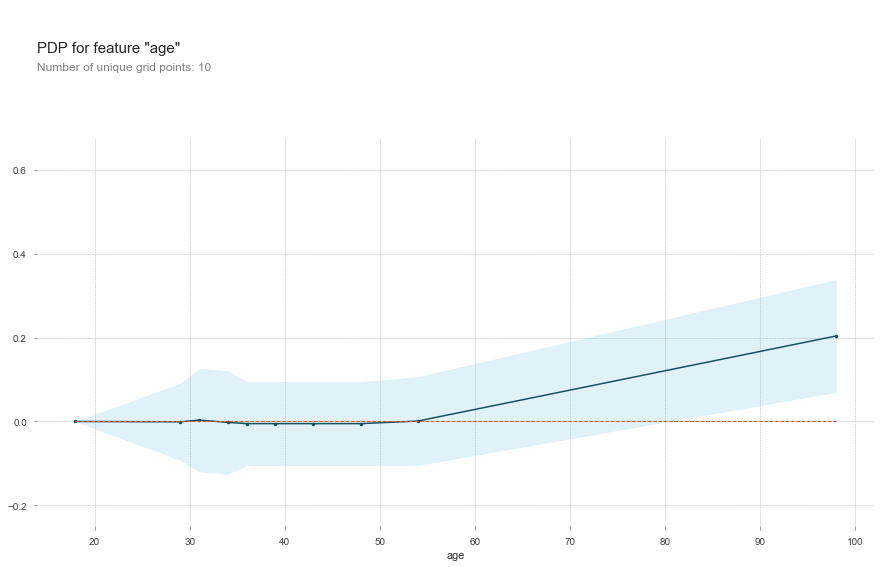

In [93]:
pdp_rad = pdp.pdp_isolate(model=alg, dataset=X_test, model_features=X_test.columns, feature='age')
pdp.pdp_plot(pdp_rad, 'age')
plt.show()

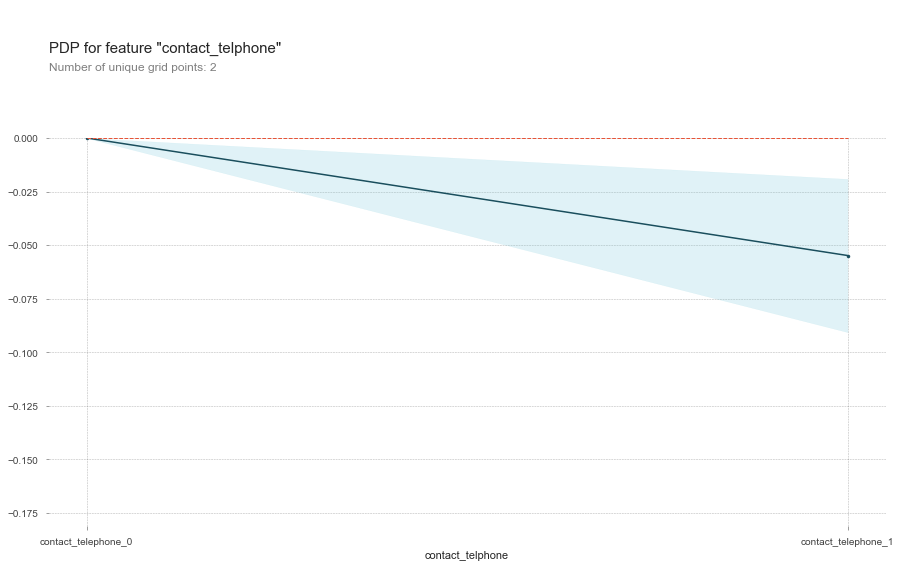

In [94]:
pdp_rad = pdp.pdp_isolate(model=alg, dataset=X_test, model_features=X_test.columns, feature='contact_telephone')
pdp.pdp_plot(pdp_rad, 'contact_telphone')
plt.show()

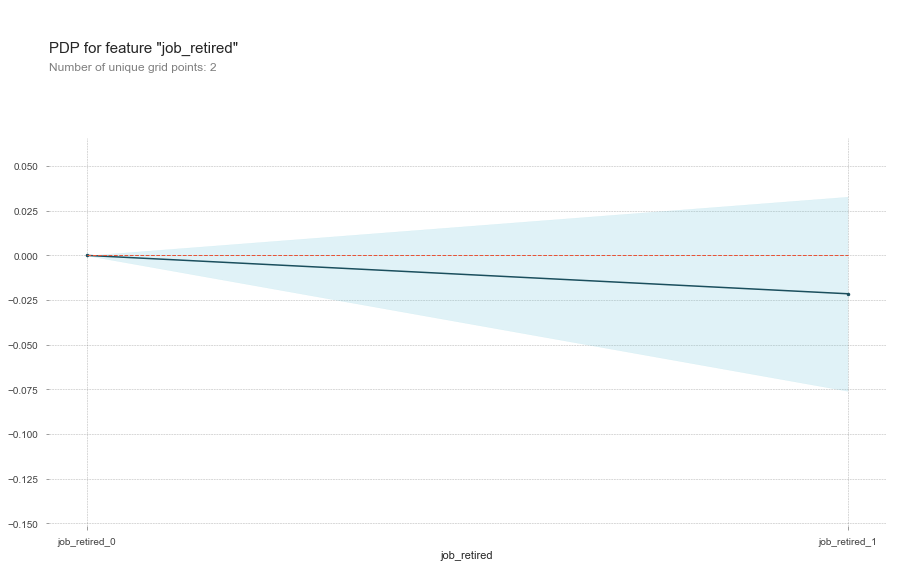

In [95]:
pdp_rad = pdp.pdp_isolate(model=alg, dataset=X_test, model_features=X_test.columns, feature='job_retired')
pdp.pdp_plot(pdp_rad, 'job_retired')
plt.show()

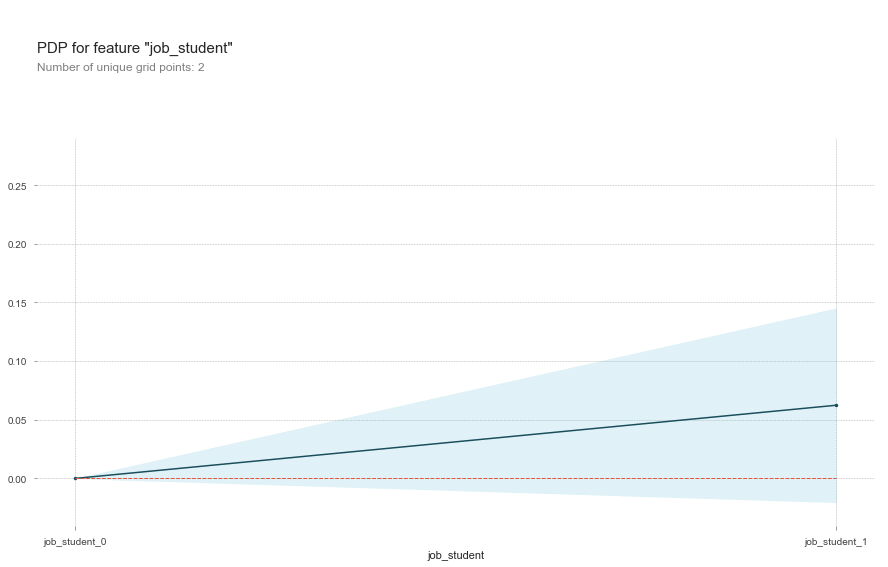

In [96]:
pdp_rad = pdp.pdp_isolate(model=alg, dataset=X_test, model_features=X_test.columns, feature='job_student')
pdp.pdp_plot(pdp_rad, 'job_student')
plt.show()

Se observa en la mayoria exeptuando para age que el efecto de las varibles sobre la variable objetivo tiene un comportamiento ue sugieren que su relacion es lineal. De los anteriores casos exeptuando  poutcome_failure y contact_telephone  son los unico que el intervalo de confianza logra tomar valores de cero. Esto anterior es imporante por que prmiten entender en que valores  puede ser relevante el efectos de las variables y encuales no, sobretodo si es correcto o no asumir que puede o no haber un efect en la variable objetivo derivado de las demas variables. Depronto el caso mas diciente para este ejrcicio es el de la variable age , donde se evidencia que no existe un comportamiento lineal y que dependiendo de cierto valor, el efeco de la variable age sobre la vaiable objeivo ambia completamente su comportamiento.

<h3>Para el modelo seleccionado, pinte un gráfico de para estudiar los Shapley Values.</h3>

In [97]:
import shap

In [98]:
row = 5
data_for_prediction = X_test.iloc[row]  # use 1 arbitrary row of data
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

In [100]:
explainer = shap.TreeExplainer(alg)
shap_values = explainer.shap_values(data_for_prediction)

In [101]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [128]:
row = 2
data_for_prediction = X_test.iloc[row]  # use 1 arbitrary row of data
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
explainer = shap.TreeExplainer(alg)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

En las dos graficas anteriores se ve elefecto que tienen las variables sobre las prediccion para diferentes registrso/personas.Es evidenciable que para cada una diferentes variables aportan informacion para la prediccion y que el efecto de las predicciones puede incrementar o diminuir el valor de la prediccion.

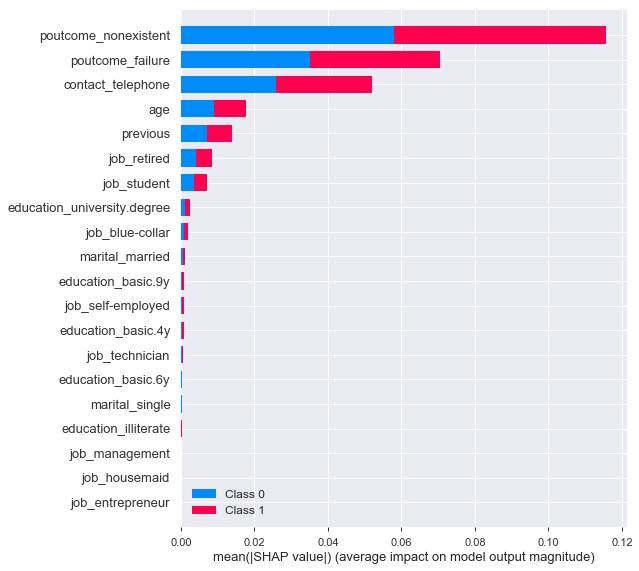

In [134]:
data_for_prediction = X_test#.iloc[row]  # use 1 arbitrary row of data
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

explainer = shap.TreeExplainer(alg)
shap_values = explainer.shap_values(data_for_prediction)
shap.summary_plot(shap_values, X_train, plot_type="bar")

En la grafica anterior se observa el efecto considerado en  el modelo que cada variable tiene sobre la variable objetivo. Es importante destcar que las principales caracteristicas/variables tienen un efecto que puede  determinar si el output o predicción es 0 o 1.